In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt



In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "E:\ALUuu\traning",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\prith\AppData\Local\Temp\ipykernel_12360\1370416686.py:2: SyntaxWarning: invalid escape sequence '\A'
  "E:\ALUuu\traning",


NotFoundError: Could not find directory E:\ALUuu	raning

In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())


(32, 256, 256, 3)
[1 0 1 0 1 2 0 1 2 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1]


# Image Visual

(32, 256, 256, 3)
[1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 2 1 0 0 0 0 0 1 0 0]


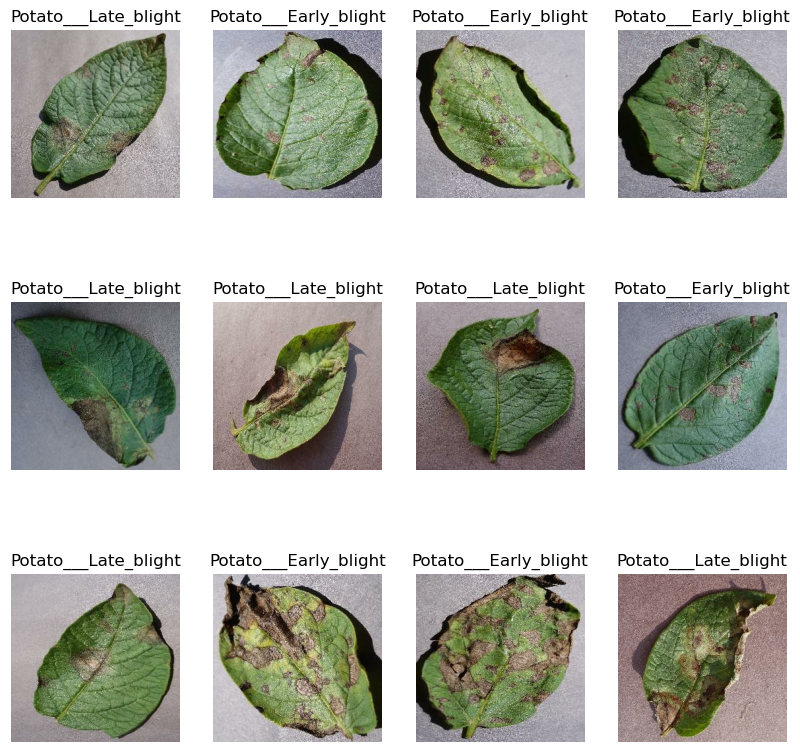

In [ ]:
import matplotlib.pyplot as plt

for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    plt.figure(figsize=(10, 10))
    for i in range(min(12, len(image_batch))): 
        plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title(class_names[labels_batch[i]]) 
        plt.axis("off")
        

In [ ]:
# 80% ==> Training
# 10% ==> Validation
# 10% ==> Test

In [ ]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
test_ds=dataset.take(54)
len(test_ds)

54

In [ ]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds= test_ds.take(6)
len(val_ds)

6

In [ ]:
val_ds= test_ds.take(6)
len(val_ds)

6

In [ ]:
def get_dataset_partition_tf(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1.0

    # Convert cardinality to int
    ds_size = tf.data.experimental.cardinality(ds).numpy()
    if ds_size == tf.data.UNKNOWN_CARDINALITY:
        raise ValueError("Dataset size is unknown. Can't split.")

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)  # use 'seed', not 'speed'

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)

    return train_ds, val_ds, test_ds


In [ ]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [ ]:
len(train_ds)
len(val_ds)
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.64705884 0.654902   0.7058824 ]
  [0.7019608  0.70980394 0.7607843 ]
  [0.6156863  0.62352943 0.6745098 ]
  ...
  [0.7254902  0.7176471  0.76862746]
  [0.73333335 0.7254902  0.7764706 ]
  [0.6901961  0.68235296 0.73333335]]

 [[0.62352943 0.6313726  0.68235296]
  [0.65882355 0.6666667  0.7176471 ]
  [0.59607846 0.6039216  0.654902  ]
  ...
  [0.7254902  0.7176471  0.76862746]
  [0.7019608  0.69411767 0.74509805]
  [0.72156864 0.7137255  0.7647059 ]]

 [[0.67058825 0.6784314  0.7294118 ]
  [0.6666667  0.6745098  0.7254902 ]
  [0.62352943 0.6313726  0.68235296]
  ...
  [0.7254902  0.7176471  0.76862746]
  [0.7058824  0.69803923 0.7490196 ]
  [0.6901961  0.68235296 0.73333335]]

 ...

 [[0.5176471  0.5058824  0.54901963]
  [0.6117647  0.6        0.6431373 ]
  [0.5568628  0.54509807 0.5882353 ]
  ...
  [0.5019608  0.49411765 0.54901963]
  [0.49019608 0.48235294 0.5372549 ]
  [0.49019608 0.48235294 0.5372549 ]]

 [[0.44313726 0.43137255 0.4745098 ]
  [0.56078434 0.54901963 0.5921569 ]


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


# USE CNN 


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Constants
IMAGE_SIZE = 256
CHANNELS = 3
NUM_CLASSES = 3

# Preprocessing layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

# Data augmentation layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

# Build model
model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),

    # Preprocessing
    resize_and_rescale,
    data_augmentation,

    # Convolution + Pooling layers
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPool2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dropout(0.5),  # Helps reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # or 'categorical_crossentropy' for one-hot labels
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_12 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,846,723 (7.04 MB)

 Trainable params: 1,846,723 (7.04 MB)

 Non-trainable params: 0 (0.00 B)